In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import random

## 0、数据处理成csv形式

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
          'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']
df_train_set = pd.read_csv('./adult.data', names=columns)
df_test_set = pd.read_csv('./adult.test', names=columns, skiprows=1) #第一行是非法数据

print(df_train_set.head())
print(df_test_set.head())
df_train_set.to_csv('./train_adult.csv', index=False)
df_test_set.to_csv('./test_adult.csv', index=False)

   age          workclass  fnlwgt   education  educationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         maritalStatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalGain  capitalLoss  hoursPerWeek   nativeCountry  income  
0         2174            0            40   United-States   <=50K  
1         

In [4]:
df_test_set.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
len(df_train_set), len(df_test_set), len(df_test_set.columns)

(32561, 16281, 15)

## 1、数据读取

In [6]:
df_train_set = pd.read_csv('./train_adult.csv')
df_train_set

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 2、数据预处理

### 2.1 删除对应属性

In [7]:
df_train_set.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) # fnlwgt列用处不大，educationNum与education类似
print(df_train_set.columns)

Index(['age', 'workclass', 'education', 'maritalStatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', 'nativeCountry', 'income'],
      dtype='object')


### 2.2 重复行记录处理

In [8]:
df_train_set.drop_duplicates(inplace=True) # 去除重复行

In [9]:
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### 2.3 缺失值处理

In [10]:
df_train_set[df_train_set.isna().values == True] # 输出有缺失值的数据行

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income


In [11]:
df_train_set.dropna(inplace=True) # 去除空行 

### 2.4 查看列类型

In [12]:
df_train_set.dtypes

age               int64
workclass        object
education        object
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
capitalGain       int64
capitalLoss       int64
hoursPerWeek      int64
nativeCountry    object
income           object
dtype: object

### 2.5 异常值处理

In [13]:
df_train_set[df_train_set['workclass'].str.contains(r'\?', regex=True)] # 查找异常值, 避免与正则表达式的?冲突需要转义

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
df_train_set=df_train_set[~df_train_set['workclass'].str.contains(r'\?', regex=True)]
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
#删除有异常值的行
new_columns = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
               'nativeCountry', 'income']
for col in new_columns:
        df_train_set = df_train_set[~df_train_set[col].str.contains(r'\?', regex=True)]
df_train_set.head()

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.6 数据可视化，以年龄为例

<Axes: ylabel='Frequency'>

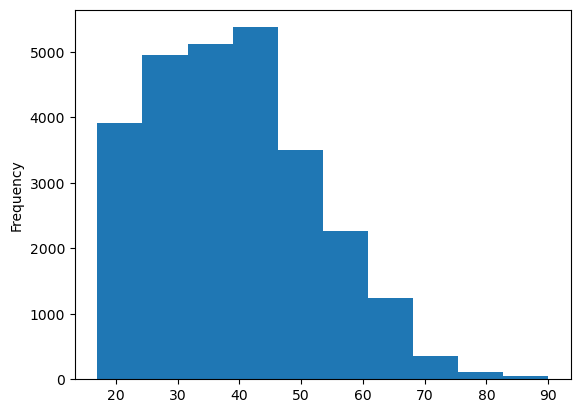

In [16]:
df_train_set['age'].plot.hist()

<Axes: xlabel='age'>

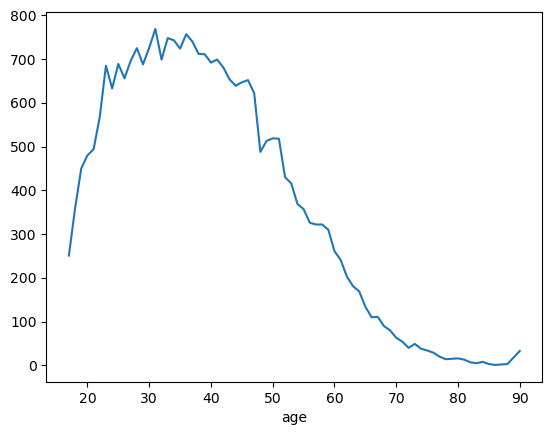

In [17]:
df_train_set['age'].value_counts().sort_index().plot.line()

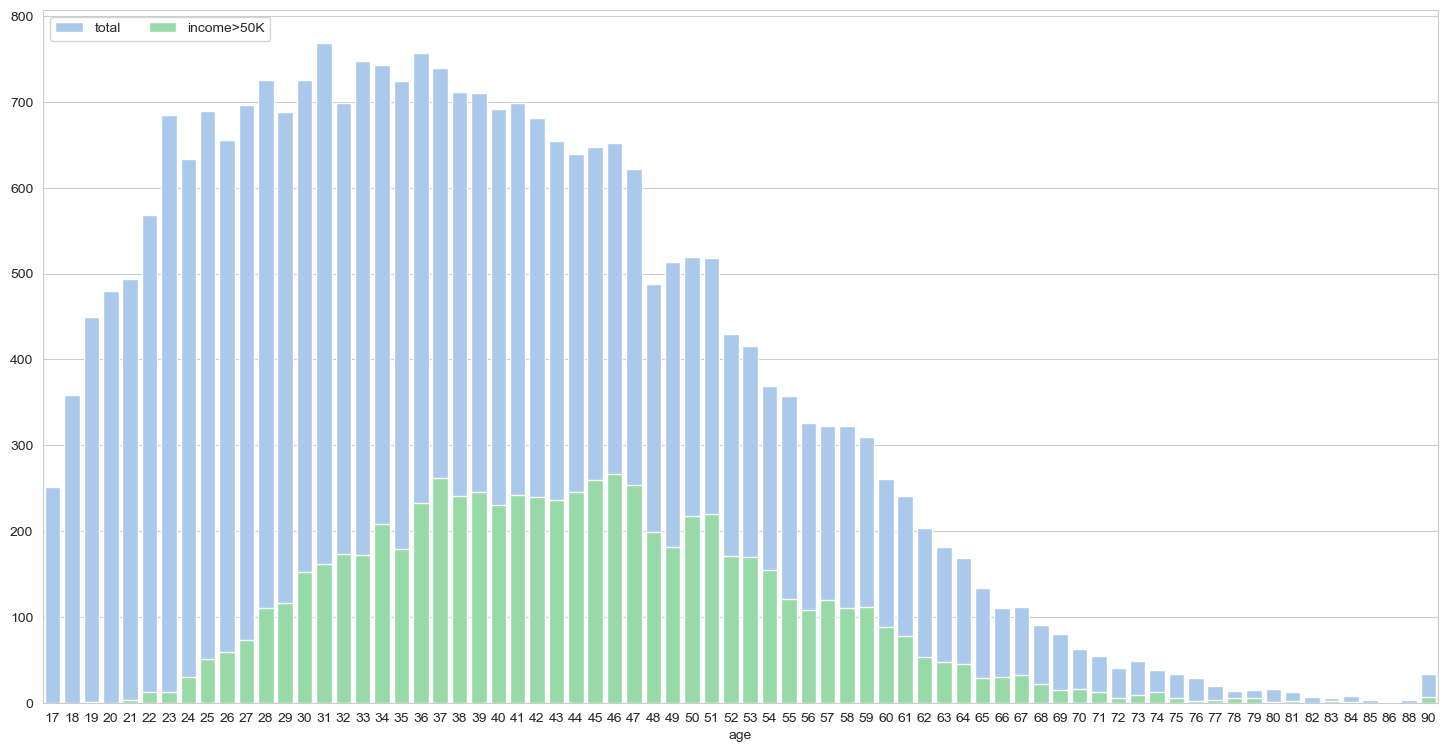

In [18]:
# 画出年龄与收入的关系

df_train_set = df_train_set.reset_index(drop=True) #重置索引
df_train_set['age'].isnull() == True
s=df_train_set['age'].value_counts()
k=df_train_set['age'][df_train_set['income']==' >50K'].value_counts()
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(x=s.index,y=s.values,label='total',color="b")
sns.barplot(x=k.index,y=k.values,label='income>50K',color="g")
ax.legend(ncol=2, loc="upper left", frameon=True)

### 2.7 连续型变量处理

In [19]:
continuous_column = ['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

In [20]:
df_train_set['age'].max(), df_train_set['age'].min()

(90, 17)

In [21]:
df_train_set['age'].head() 

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [22]:
bins = [0, 25, 50, 75, 100] # 分箱区间左开右闭 (0, 25], (25, 50], ...
df_train_set['age'] = pd.cut(df_train_set['age'], bins, labels=False)

In [23]:
df_train_set['age'].head() 

0    1
1    1
2    1
3    2
4    1
Name: age, dtype: int64

### 2.8 离散型变量处理

In [24]:
discrete_column = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']

In [25]:
df_train_set['workclass'].value_counts()

workclass
Private             19214
Self-emp-not-inc     2431
Local-gov            2014
State-gov            1253
Self-emp-inc         1049
Federal-gov           929
Without-pay            14
Name: count, dtype: int64

In [26]:
df_train_set['workclass'].head() #展示前五条

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [30]:
df_train_set['workclass'].value_counts().keys()
# df_test_set['workclass'].value_counts().keys()

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay'],
      dtype='object', name='workclass')

In [31]:
workclass_mapping = {' Private': 0, ' Self-emp-not-inc': 1, ' Self-emp-inc': 1, ' Local-gov': 2, 
                     ' State-gov': 2, ' Federal-gov': 2, ' Without-pay': 3, ' Never-worked': 3}
df_train_set['workclass'] = df_train_set['workclass'].map(workclass_mapping)

In [32]:
df_train_set['workclass'].head()

0    2
1    1
2    0
3    0
4    0
Name: workclass, dtype: int64

## 3. 构造决策树，进行训练

In [ ]:
def calc_gini(df):
    """
    计算数据集的基尼指数
    :param df: 数据集
    :return: 基尼指数
    """
    

def split_dataset(df, index, value):
    """
    按照给定的列划分数据集
    :param df: 原始数据集
    :param index: 指定特征的列索引
    :param value: 指定特征的值
    :return: 切分后的数据集
    """
    
    
def choose_best_feature_to_split(df):
    """
    选择最好的特征进行分裂
    :param df: 数据集
    :return: best_value:(分裂特征的index, 特征的值), best_df:(分裂后的左右子树数据集), best_gain:(选择该属性分裂的最大信息增益)
    """


def build_decision_tree(df, columns, flags):
    """
    构建CART树
    :param df: 数据集
    :param columns: 特征列表
    :param flags: 区分特征是否被完全区分开,初始为全0, 若某个特征被区分开那么flags对应的下标为0
    :return: CART树
    """
    
    # 递归结束情况1: 若当前集合的所有样本标签相等,即样本已被分"纯",则可以返回该标签值作为一个叶子节点
    # 递归结束情况2: 若当前训练集的所有特征都被使用完毕,当前无可用特征但样本仍未分"纯"，则返回样本最多的标签作为结果
    
    
def save_decision_tree(cart):
    """
    决策树的存储
    :param cart: 训练好的决策树
    :return: void
    """
    np.save('cart.npy', cart)
    
    
def load_decision_tree():
    """
    决策树的加载
    :return: 保存的决策树
    """    
    
    cart = np.load('cart.npy', allow_pickle=True)
    return cart.item()


In [ ]:
df_train = df_train_set.copy() #防止预处理重新来

In [ ]:
columns = df_train.columns.to_list()
flags = [0 for i in range(len(columns))]

In [ ]:
df_train.head()

In [ ]:
cart = build_decision_tree(df_train, columns, flags)
save_decision_tree(cart)

## 4. 评估

In [ ]:
def classify(cart, df_row, columns):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df_row: 一条测试样本
    :param columns: 特征列表
    :return: 预测结果
    """
    


def predict(cart, df, columns):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df: 所有测试集
    :param columns: 特征列表
    :return: 预测结果
    """
    pred_list = []
    for i in range(len(df)):
        pred_label = classify(cart, df.iloc[i,:], columns)
        if pred_label == -1:
            pred_label = random.randint(0, 1) # 防止classify执行到返回-1,但一般不会执行到返回-1
        pred_list.append(pred_label)
    return pred_list

def calc_acc(pred_list, test_list):
    """
    返回预测准确率
    :param pred_list: 预测列表
    :param test_list: 测试列表
    :return: 准确率
    """
    pred = np.array(pred_list)
    test = np.array(test_list)
    acc = np.sum(pred_list == test_list) / len(test_list)
    return acc

## 5. Demo

#### (1) 下面只是测试模型能不能跑通,实际操作时需要用测试集进行评估
#### (2) 此外，测试集应该需要做和训练集一样的预处理操作

In [ ]:
columns = df_train.columns.to_list()

In [ ]:
cart = load_decision_tree() # 加载模型

In [ ]:
test_list = df_train['income'].to_numpy()
pred_list = predict(cart, df_train, columns)

In [ ]:
acc = calc_acc(pred_list, test_list)

In [ ]:
acc